In [9]:
import cv2
import matplotlib.pyplot as plt


# Imageopen

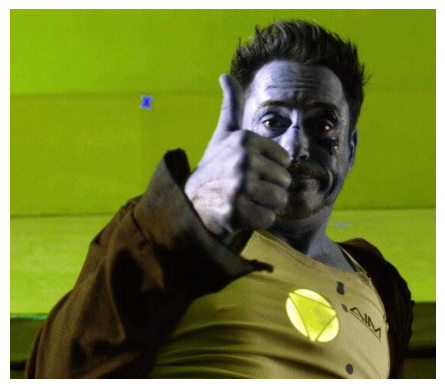

In [10]:

img = cv2.imread('images/stark.jpg')
plt.imshow(img, cmap='gray')
plt.axis( 'off')
plt.show()


# Edge Detection

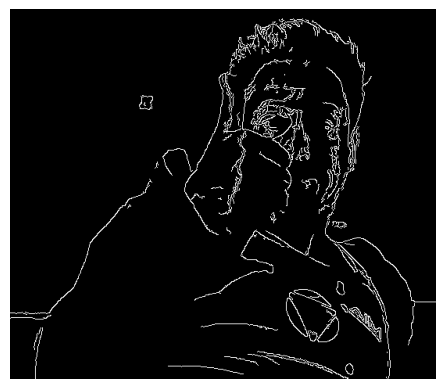

In [11]:
# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)
plt.figure()
plt.imshow(edges, cmap='gray')
plt.axis( 'off')
plt.show()

# Contour detection

Number of Contours found = 132


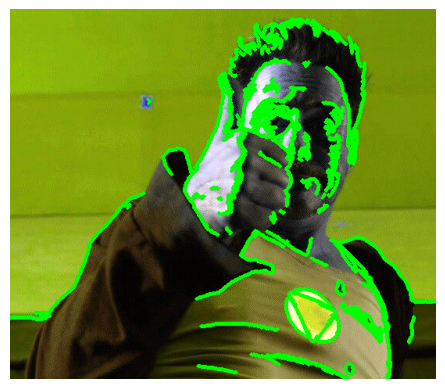

In [12]:
# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray,100, 200, 3, L2gradient=True)
plt.axis('off')
#plt.imshow(edged,cmap='gray')

# Finding Contours

# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow( img)

